In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
X = np.genfromtxt('ex7data1.txt')                                                   # load data
K = 3                                                                               # 3 centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [3]:
def findClosestCentroids(X, centroids):
    K = len(centroids)
    m = len(X)
    idx = np.zeros(m, dtype = int)
    for i in range(m):
        dist = np.zeros(K)
        for j in range(K):
            dist[j] = np.sum((X[i, :] - centroids[j, :])**2)
        idx[i] = np.argmin(dist)
    return idx

def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i,:] = np.mean(X[np.where(idx == i), :], axis = 1)
    return centroids

def runKMeans(X, initial_centroids, max_iter, plot_progress = None):
    plt.figure(figsize = (15, 9))
    # initial parameters
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)
    
    if plot_progress != None:
        colors = ['r', 'g', 'b']
        plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker = 'x', s = 125, color = 'black')
    
    #run Kmeans
    for i in range(max_iter):
        print('...', end = '')
        pre_centroids = centroids
        
        idx = findClosestCentroids(X, centroids)        
        centroids = computeCentroids(X, idx, K)
        
        # plot progress
        if plot_progress != None:
            plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 125, color = 'black')
            for i in range(K):
                coor_draw = np.array([pre_centroids[i, :], centroids[i, :]])
                plt.plot(coor_draw[:, 0], coor_draw[:, 1], color = 'black', linestyle = 'dashed')
    
    # plot scatter after train
    if plot_progress != None:
        for i in range(K):
            cluster = np.where(idx == i)
            plt.scatter(X[cluster, 0], X[cluster, 1], color = 'None', edgecolors = colors[i])
        plt.show()
    
    return centroids

In [4]:
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples:', idx[:3])

Closest centroids for the first 3 examples: [0 2 1]


..............................

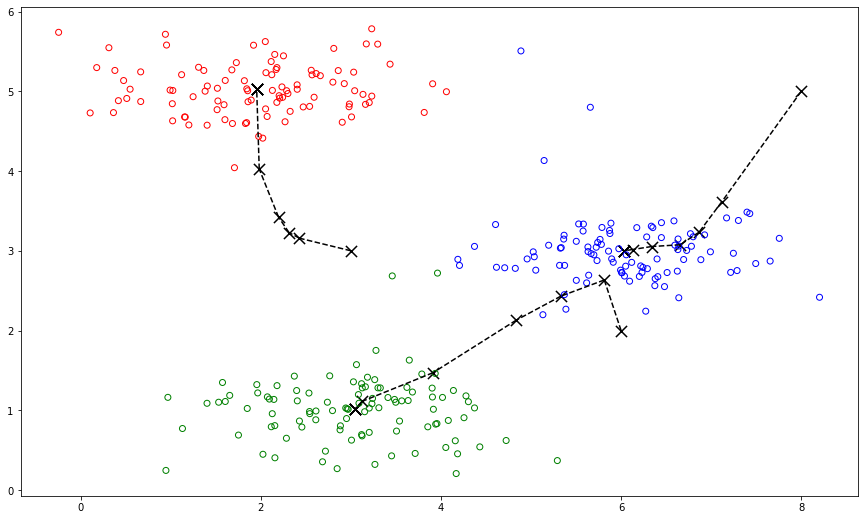

In [5]:
max_iter = 10
centroids = runKMeans(X, initial_centroids, max_iter, 1)

In [6]:
# a good strategy for initializing the centroids is to select random examples from the training set
def KMeansInitCentroids(X, K):
    randidx = np.random.randint(len(X), size=(K))
    centroids = X[randidx, :]
    return centroids

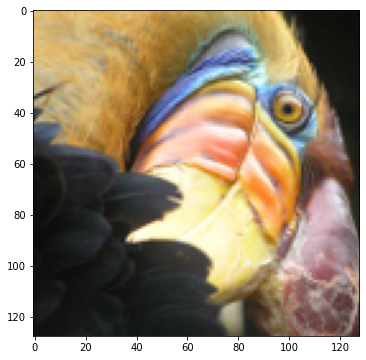

---------------------------------------
(128, 128, 3)


In [7]:
# image compression with KMeans
import imageio
import matplotlib.image as mpimg

# show image
img = mpimg.imread('bird_small.png')
plt.figure(figsize = (8, 6))
plt.imshow(img)
plt.show()

img = imageio.imread('bird_small.png')                   # load image to array
img_shape = img.shape
print('---------------------------------------')
print(img_shape)
img = img / 255                                           # Divide by 255 so that all values are in the range 0 - 1

In [8]:
X = img.reshape((img_shape[0] * img_shape[1], img_shape[2]))
K = 16                                                    # hmm, why 16...? 255 colors --------> 16 colors
max_iters = 10

In [9]:
# initial parameters and run KMeans
initial_centroids = KMeansInitCentroids(X, K)
centroids = runKMeans(X, initial_centroids, max_iter)
print('\n', centroids)

..............................
 [[0.5454035  0.41051511 0.25169621]
 [0.7283085  0.65316078 0.60012026]
 [0.77370083 0.63244617 0.39277036]
 [0.88908036 0.71633527 0.44760011]
 [0.06862365 0.07465411 0.06437297]
 [0.56232167 0.70443619 0.85707771]
 [0.88433527 0.76248961 0.72900545]
 [0.97110754 0.96206842 0.86371447]
 [0.95106383 0.86122931 0.57662356]
 [0.37141541 0.31185858 0.2848823 ]
 [0.14738562 0.15340414 0.14515251]
 [0.76240886 0.53157075 0.23587103]
 [0.98038706 0.91669854 0.73160458]
 [0.23790723 0.21900893 0.21033417]
 [0.53569938 0.49479366 0.503368  ]
 [0.09934469 0.10719814 0.09697884]]


<Figure size 1080x648 with 0 Axes>

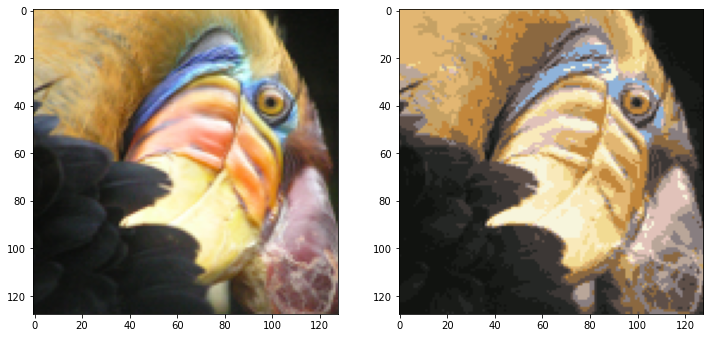

In [10]:
# reconstruct the image
idx = findClosestCentroids(X, centroids)
img_recovered = centroids[idx, :].reshape((img_shape[0], img_shape[1], img_shape[2]))
plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_recovered)
plt.show()

Text(0.5, 1.0, 'Figure: Example data set 2')

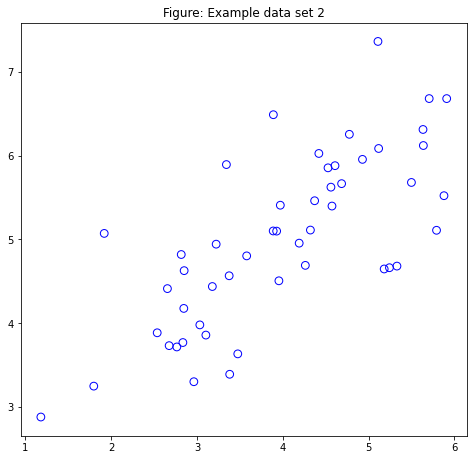

In [169]:
# PCA
X = np.genfromtxt('ex7data2.txt')
fig, ax = plt.subplots(figsize = (8, 7.6))
ax.scatter(X[:, 0], X[:, 1], s = 60, color = 'None', edgecolors = 'blue')
ax.set_title('Figure: Example data set 2')

In [170]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma
def pca(X):
    m = len(X)
    sigma = X.T.dot(X) / m  # covariance matrix
    U, S, V = LA.svd(sigma) # U contain the principal components, S contain a diagonal matrix
    return U, S

In [171]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)

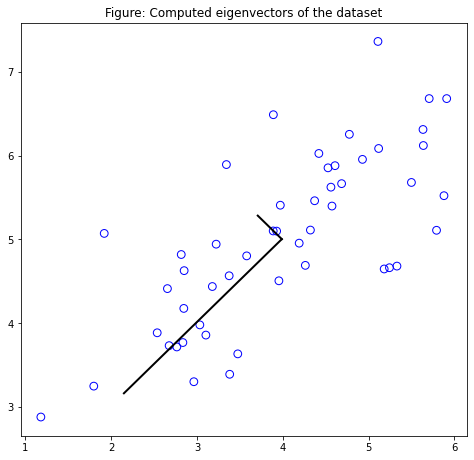

In [172]:
point_1 = mu
point_2 = mu + 1.5 * S[0] * U[:, 0]
point_3 = mu + 1.5 * S[1] * U[:, 1]
X_coor = np.array([point_1[0], point_2[0]])
y_coor = np.array([point_1[1], point_2[1]])
ax.plot(X_coor, y_coor, color = 'black', linewidth = 2)
X_coor = np.array([point_1[0], point_3[0]])
y_coor = np.array([point_1[1], point_3[1]])
ax.plot(X_coor, y_coor, color = 'black', linewidth = 2)
ax.set_title('Figure: Computed eigenvectors of the dataset')
fig

In [187]:
def projectData(X, U, K):
    Z = np.zeros((len(X), K))
    U_reduce = U[:, : K]
    Z = X.dot(U_reduce)
    return Z

In [188]:
# project data onto k = 1 dimensions
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: ', Z[0])

Projection of the first example:  [1.49631261]


In [189]:
# recover data
def recoverData(Z, U, K):
    X_rec = np.zeros((len(Z), len(U)))
    U_reduce = U[:, :K]
    X_rec = Z.dot(U_reduce.T)
    return X_rec

In [190]:
X_rec = recoverData(Z, U, K)
print('Approximation of the first example: ', X_rec[0, 0], X_rec[0, 1])

Approximation of the first example:  -1.058052792215479 -1.0580527922154785


In [192]:
X_norm

array([[-0.52331306, -1.59279252],
       [ 0.46381518,  0.84034523],
       [-1.14839331, -0.58315891],
       [-1.05405373, -1.27071783],
       [-0.98402167, -0.81658417],
       [-0.08490201,  1.46633377],
       [-0.44215763, -1.35221333],
       [ 1.65512709,  1.65622961],
       [-0.05198776,  0.09440201],
       [ 0.49305926,  0.61245677],
       [ 0.50359639,  0.38973079],
       [ 0.32935623,  0.45242294],
       [ 0.17431804, -0.04748911],
       [ 1.08056741, -0.33689741],
       [-0.99325294, -1.21879564],
       [ 1.41742949,  1.2923503 ],
       [ 0.60026548,  0.65385535],
       [-0.98061738, -0.37147508],
       [ 0.96523763,  2.32981886],
       [ 1.02758927, -0.35168199],
       [ 1.47948139,  1.65649752],
       [-0.35270365, -0.19743438],
       [ 1.42096706,  1.10315449],
       [ 0.23612558, -0.30931801],
       [-1.25101023, -1.1038306 ],
       [-0.65914279, -0.05946964],
       [ 0.80965726,  0.93988073],
       [ 1.55321995,  0.10421963],
       [-1.00960756,